In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set Visualization Style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
df = pd.read_csv("earthquake_data_tsunami.csv")

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB
None


In [5]:
print(df.describe())

        magnitude         cdi         mmi          sig         nst  \
count  782.000000  782.000000  782.000000   782.000000  782.000000   
mean     6.941125    4.333760    5.964194   870.108696  230.250639   
std      0.445514    3.169939    1.462724   322.465367  250.188177   
min      6.500000    0.000000    1.000000   650.000000    0.000000   
25%      6.600000    0.000000    5.000000   691.000000    0.000000   
50%      6.800000    5.000000    6.000000   754.000000  140.000000   
75%      7.100000    7.000000    7.000000   909.750000  445.000000   
max      9.100000    9.000000    9.000000  2910.000000  934.000000   

             dmin         gap       depth    latitude   longitude  \
count  782.000000  782.000000  782.000000  782.000000  782.000000   
mean     1.325757   25.038990   75.883199    3.538100   52.609199   
std      2.218805   24.225067  137.277078   27.303429  117.898886   
min      0.000000    0.000000    2.700000  -61.848400 -179.968000   
25%      0.000000   14.6

In [6]:
print(df.head())

   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  


In [7]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [8]:
# Handling Missing Values
df = df.dropna(subset=['latitude', 'longitude', 'magnitude', 'depth'])
print("Cleaned Data Shape:", df.shape)

Cleaned Data Shape: (782, 13)


In [9]:
# Combine year and month into a single date column
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')


# 1. Time-Series Analysis

In [10]:
df['Year'] = pd.to_datetime(df['date']).dt.year
yearly_counts = df.groupby('Year')['tsunami'].sum()

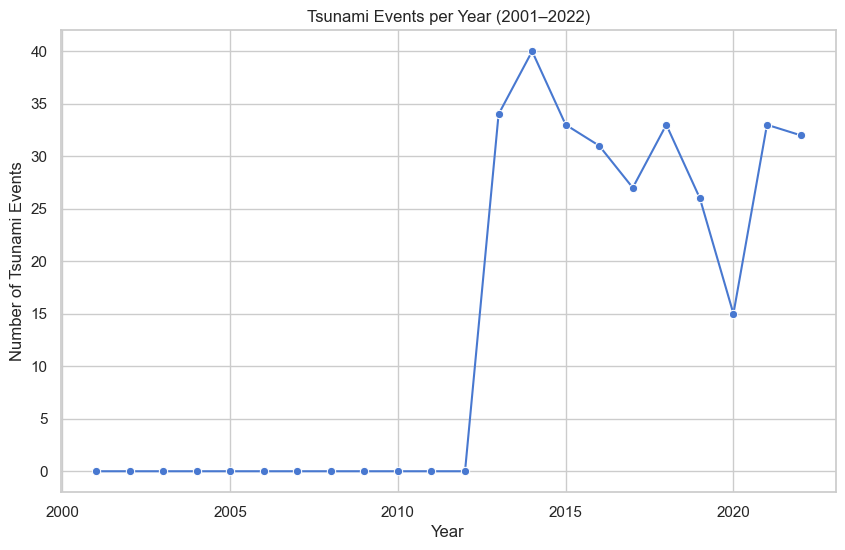

In [11]:
plt.figure()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.title("Tsunami Events per Year (2001–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Tsunami Events")
plt.show()

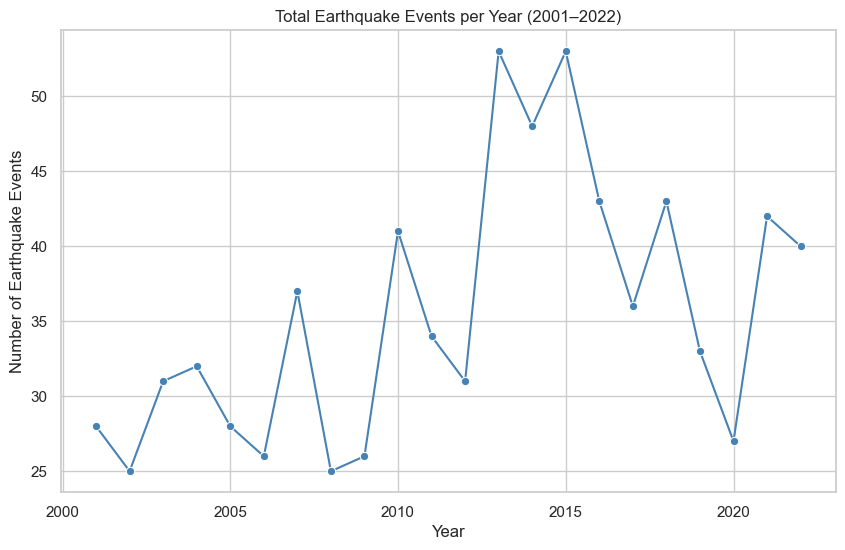

In [12]:
yearly_eq_counts = df.groupby('Year').size()

plt.figure()
sns.lineplot(x=yearly_eq_counts.index, y=yearly_eq_counts.values, marker="o", color="steelblue")
plt.title("Total Earthquake Events per Year (2001–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Earthquake Events")
plt.show()


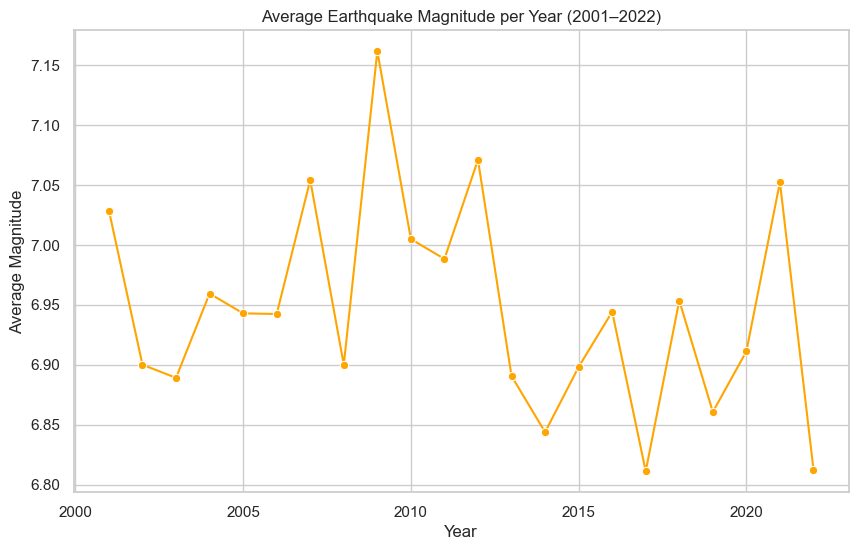

In [13]:
yearly_mag = df.groupby('Year')['magnitude'].mean()

plt.figure()
sns.lineplot(x=yearly_mag.index, y=yearly_mag.values, marker="o", color="orange")
plt.title("Average Earthquake Magnitude per Year (2001–2022)")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.show()


# 2. Magnitude & Depth Distributions

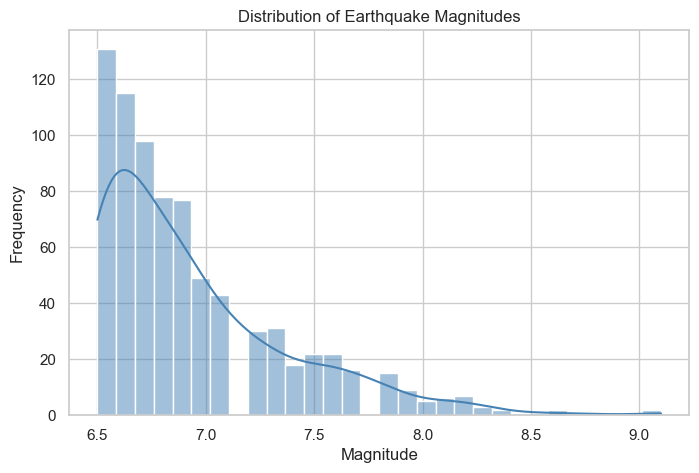

In [14]:
sns.set(style="whitegrid", palette="viridis")
# a) Distribution of Earthquake Magnitudes
plt.figure(figsize=(8, 5))
sns.histplot(df['magnitude'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()


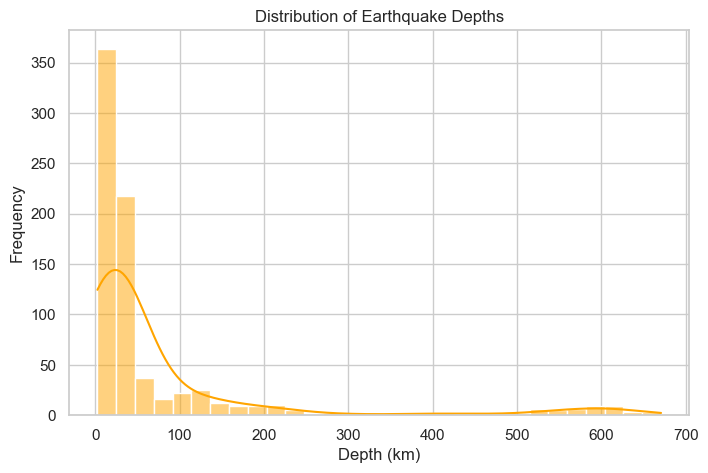

In [15]:
# b) Distribution of Earthquake Depths
plt.figure(figsize=(8, 5))
sns.histplot(df['depth'], bins=30, kde=True, color='orange')
plt.title("Distribution of Earthquake Depths")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.show()

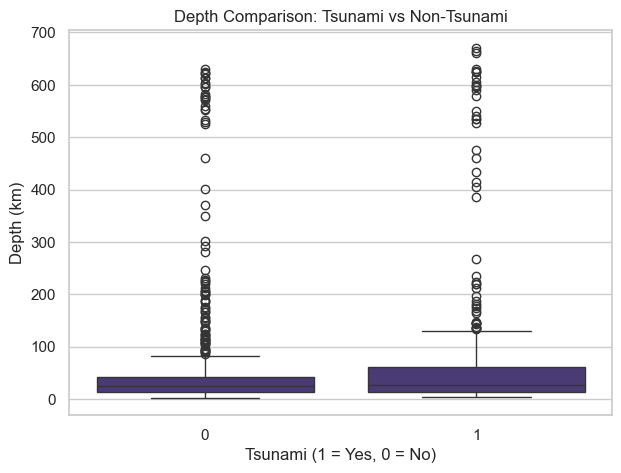

In [16]:
# Boxplot for Depth
plt.figure(figsize=(7, 5))
sns.boxplot(x="tsunami", y="depth", data=df)
plt.title("Depth Comparison: Tsunami vs Non-Tsunami")
plt.xlabel("Tsunami (1 = Yes, 0 = No)")
plt.ylabel("Depth (km)")
plt.show()

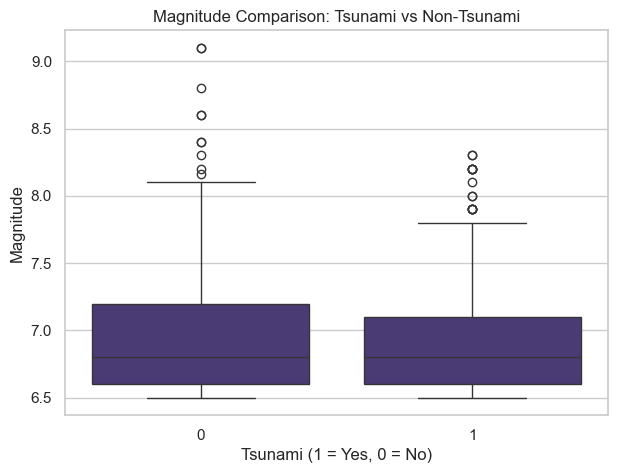

In [17]:
# c) Compare Magnitude and Depth: Tsunami vs Non-Tsunami
# Boxplot for Magnitude
plt.figure(figsize=(7, 5))
sns.boxplot(x="tsunami", y="magnitude", data=df)
plt.title("Magnitude Comparison: Tsunami vs Non-Tsunami")
plt.xlabel("Tsunami (1 = Yes, 0 = No)")
plt.ylabel("Magnitude")
plt.show()

In [18]:
# Average magnitude and depth for tsunami vs non-tsunami events
avg_stats = df.groupby('tsunami')[['magnitude', 'depth']].mean().reset_index()
print("\nAverage Magnitude and Depth by Tsunami Occurrence:")
print(avg_stats)


Average Magnitude and Depth by Tsunami Occurrence:
   tsunami  magnitude      depth
0        0   6.942803  69.667356
1        1   6.938487  85.656796


In [19]:
# d) Highlight Major Earthquakes (Magnitude ≥ 8.0)
major_quakes = df[df['magnitude'] >= 8.0].sort_values(by='date', ascending=True)

print("\nMajor Earthquakes (Magnitude ≥ 8.0):")
print(major_quakes[['date', 'latitude', 'longitude', 'magnitude', 'depth', 'tsunami']])


Major Earthquakes (Magnitude ≥ 8.0):
          date  latitude  longitude  magnitude   depth  tsunami
767 2001-06-01  -16.2650   -73.6410       8.40   33.00        0
712 2003-09-01   41.8150   143.9100       8.16   27.00        0
669 2004-12-01  -49.3120   161.3450       8.10   10.00        0
668 2004-12-01    3.2950    95.9820       9.10   30.00        0
657 2005-03-01    2.0850    97.1080       8.60   30.00        0
628 2006-05-01  -19.9900  -173.9070       8.00   60.50        0
627 2006-05-01  -20.1870  -174.1230       8.00   55.00        0
614 2006-11-01   46.5920   153.2660       8.30   10.00        0
611 2007-01-01   46.2430   154.5240       8.10   10.00        0
606 2007-04-01   -8.4660   157.0430       8.10   24.00        0
597 2007-08-01  -13.3860   -76.6030       8.00   39.00        0
593 2007-09-01   -4.4380   101.3670       8.40   34.00        0
535 2009-09-01  -15.4890  -172.0950       8.10   18.00        0
517 2010-02-01  -36.1220   -72.8980       8.80   22.90        0
47

In [20]:
# Highlight Major Earthquakes (≥8.0) 
major_quakes = df[df['magnitude'] >= 8.0].sort_values(by='date', ascending=True)

print("Major Earthquakes (Magnitude ≥ 8.0):")
print(major_quakes[['date', 'latitude', 'longitude', 'magnitude', 'depth', 'tsunami']])


Major Earthquakes (Magnitude ≥ 8.0):
          date  latitude  longitude  magnitude   depth  tsunami
767 2001-06-01  -16.2650   -73.6410       8.40   33.00        0
712 2003-09-01   41.8150   143.9100       8.16   27.00        0
669 2004-12-01  -49.3120   161.3450       8.10   10.00        0
668 2004-12-01    3.2950    95.9820       9.10   30.00        0
657 2005-03-01    2.0850    97.1080       8.60   30.00        0
628 2006-05-01  -19.9900  -173.9070       8.00   60.50        0
627 2006-05-01  -20.1870  -174.1230       8.00   55.00        0
614 2006-11-01   46.5920   153.2660       8.30   10.00        0
611 2007-01-01   46.2430   154.5240       8.10   10.00        0
606 2007-04-01   -8.4660   157.0430       8.10   24.00        0
597 2007-08-01  -13.3860   -76.6030       8.00   39.00        0
593 2007-09-01   -4.4380   101.3670       8.40   34.00        0
535 2009-09-01  -15.4890  -172.0950       8.10   18.00        0
517 2010-02-01  -36.1220   -72.8980       8.80   22.90        0
476

# 3. Geographic Distribution

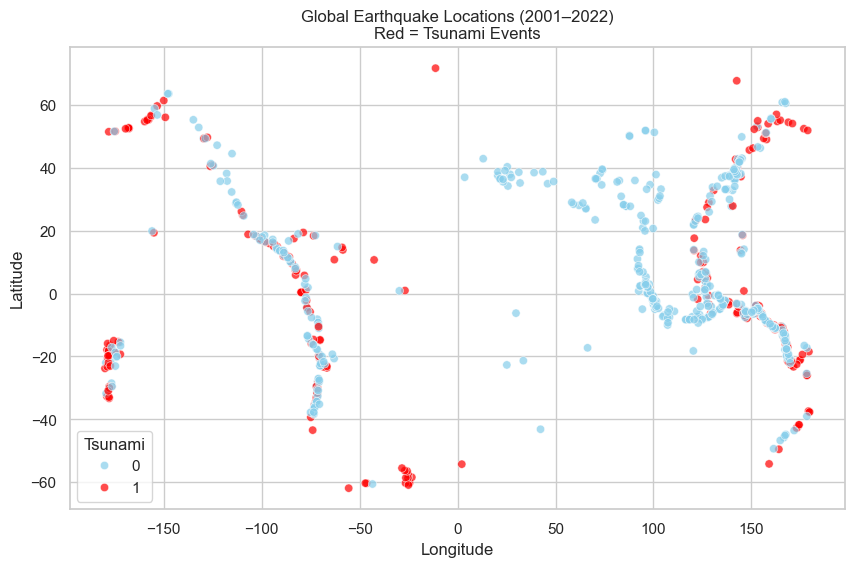

In [21]:
sns.set(style="whitegrid", palette="coolwarm")
# a) Earthquake Locations: Tsunami vs Non-Tsunami (2D Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="longitude", y="latitude",
    hue="tsunami",
    data=df,
    alpha=0.7,
    palette={0: "skyblue", 1: "red"}
)
plt.title("Global Earthquake Locations (2001–2022)\nRed = Tsunami Events")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Tsunami")
plt.show()

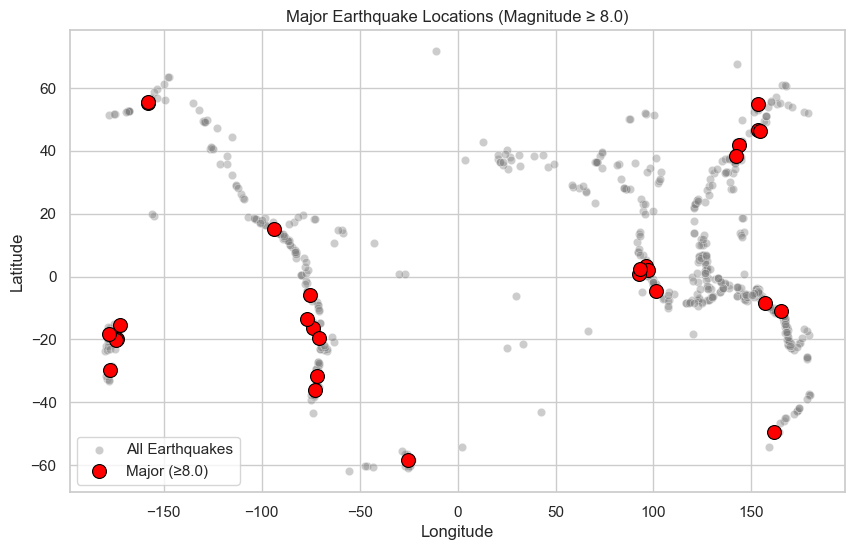

In [22]:
# b) Highlight Major Earthquakes (Magnitude ≥ 8.0) on the Map
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='longitude', y='latitude',
    alpha=0.4, color='gray', label='All Earthquakes'
)
# Overlay major (≥8.0) earthquakes in red
sns.scatterplot(
    data=major_quakes,
    x='longitude', y='latitude',
    color='red', s=100, edgecolor='black', label='Major (≥8.0)'
)
plt.title("Major Earthquake Locations (Magnitude ≥ 8.0)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

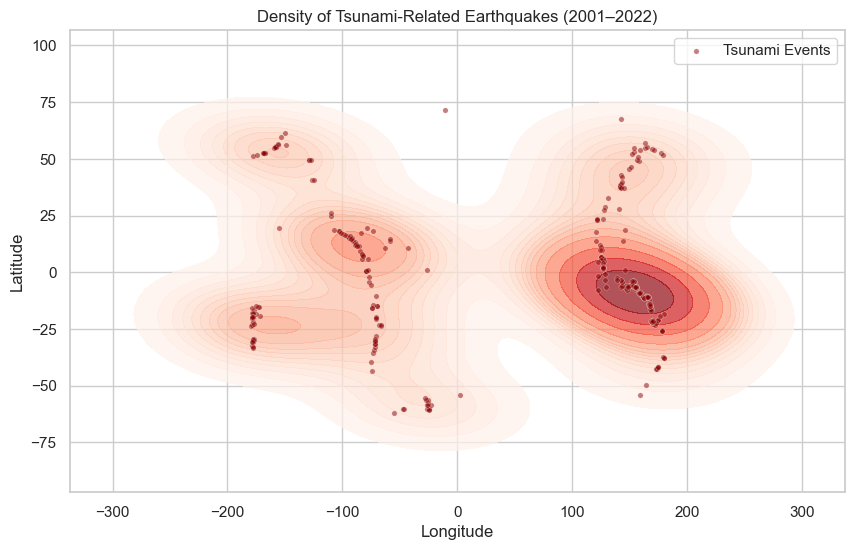

In [23]:
# c) Identify Clusters / Regions with Higher Tsunami Event Concentration
plt.figure(figsize=(10, 6))
# KDE (density) plot for tsunami events
sns.kdeplot(
    data=df[df['tsunami'] == 1],
    x='longitude', y='latitude',
    fill=True, cmap='Reds', levels=15, alpha=0.7
)
# Overlay scatter points for tsunami events
sns.scatterplot(
    data=df[df['tsunami'] == 1],
    x='longitude', y='latitude',
    color='darkred', s=15, alpha=0.5, label='Tsunami Events'
)
plt.title("Density of Tsunami-Related Earthquakes (2001–2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

# 4. Statistical and Comparative Analysis:

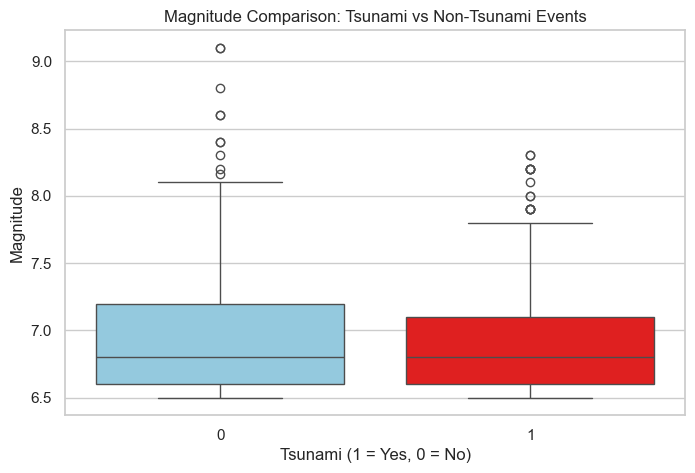

In [24]:
# a) Box Plot: Compare Magnitude by Tsunami Presence
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='tsunami', y='magnitude',
    hue='tsunami', data=df,
    palette={0: 'skyblue', 1: 'red'},
    legend=False
)
plt.title("Magnitude Comparison: Tsunami vs Non-Tsunami Events")
plt.xlabel("Tsunami (1 = Yes, 0 = No)")
plt.ylabel("Magnitude")
plt.show()
sns.set(style="whitegrid", palette="coolwarm")
df['tsunami'] = df['tsunami'].astype(int)


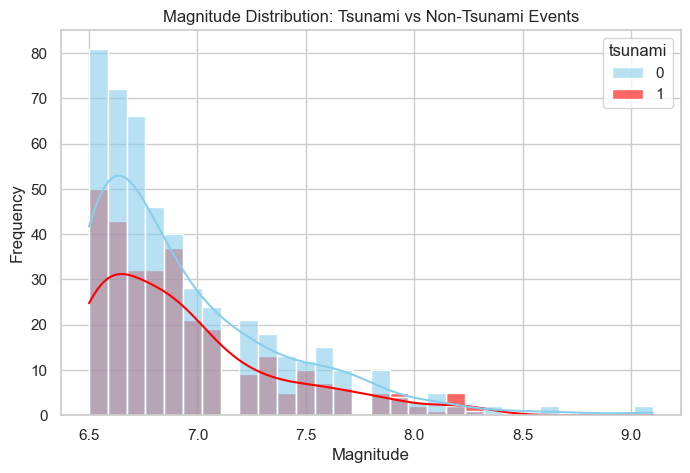

In [25]:
# b) Histogram: Magnitude Distribution by Tsunami Status
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='magnitude',
    hue='tsunami',
    bins=30,
    kde=True,
    palette={0: 'skyblue', 1: 'red'},
    alpha=0.6
)
plt.title("Magnitude Distribution: Tsunami vs Non-Tsunami Events")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

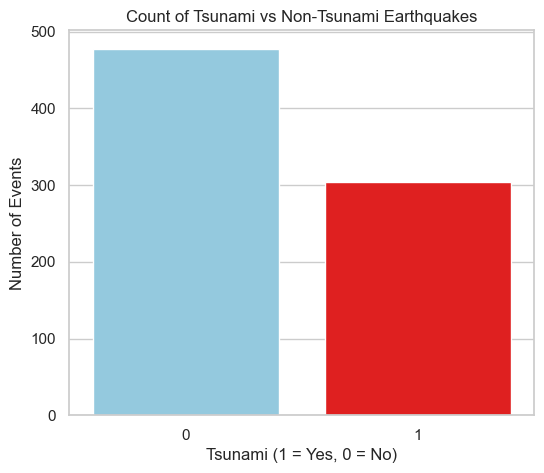

In [26]:
 # c) Bar Chart: Count of Tsunami vs Non-Tsunami Events
plt.figure(figsize=(6, 5))
sns.countplot(
    x='tsunami',
    hue='tsunami',
    data=df,
    palette={0: 'skyblue', 1: 'red'},
    legend=False
)
plt.title("Count of Tsunami vs Non-Tsunami Earthquakes")
plt.xlabel("Tsunami (1 = Yes, 0 = No)")
plt.ylabel("Number of Events")
plt.show()

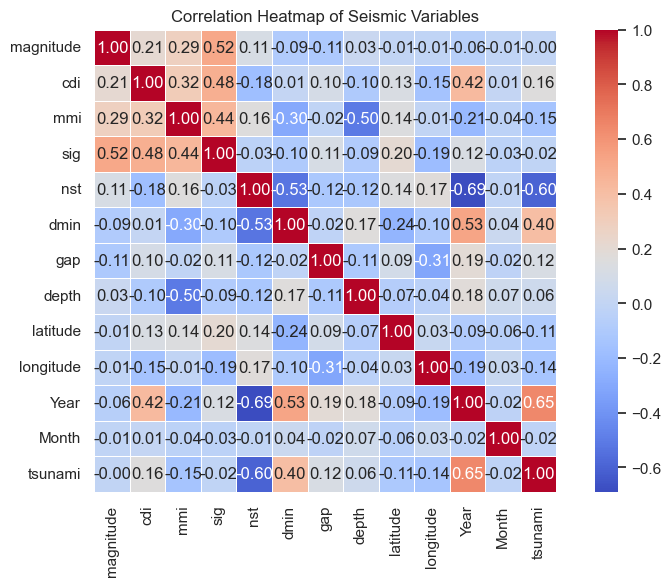

In [27]:
# (d) Correlation Heatmap of Numerical Seismic Features
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=np.number)
corr = numeric_cols.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap of Seismic Variables")
plt.show()

# 5.Insights and Observations:
1. Time-Based Analysis
  . Yearly fluctuations with peaks in active years (2004, 2011).

  . No steady rise; global seismic activity is irregular but impactful.

2. Magnitude & Depth
  . Tsunami quakes: high magnitude (≥6.5) and shallow (≤50 km).
  
  . Most ≥8.0 events cause tsunamis.

  . Shallow boundary quakes pose highest risk.

3. Geographic Distribution
  . Tsunami events cluster along subduction zones (Pacific Ring of Fire).

  . Non-tsunami quakes are globally spread.

  . High-density zones near ocean trenches.

4. Statistical Insights
  . Tsunami events → higher magnitudes, fewer in number.
 
 Correlations:
  . Tsunami quakes have higher magnitudes but are less frequent.

  . Greater magnitude increases, and deeper focus decreases tsunami likelihood.
